In [1]:
import pandas, numpy

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# 0. user-defined variables

In [4]:
input_file = '/Users/adrian/research/011.askja/results/deseq2/DESeq2_TPM_values.dog.tsv'

# 1. read expression

In [5]:
expression = pandas.read_csv(input_file, sep='\t', index_col=0)
print(expression.shape)
expression

(27046, 12)


,HRH87_CTRL1A,HRH87_CTRL2A,HRH87_CTRL3A,HRH87_60DHA1A,HRH87_60DHA2A,HRH87_60DHA3A,HRH87_120DHA1A,HRH87_120DHA2A,HRH87_120DHA3A,HRH87_240DHA1A,HRH87_240DHA2A,HRH87_240DHA3A
ENSCAFG00845000002,19.896245,20.647317,17.718525,21.229639,18.934677,19.348020,18.958580,19.086957,19.128839,19.899058,21.549606,18.223812
ENSCAFG00845000003,0.525217,0.467138,0.317258,0.598986,0.537289,0.696864,0.470977,0.632528,0.447736,0.420522,0.597507,0.523369
ENSCAFG00845000004,0.013868,0.028479,0.013970,0.000000,0.000000,0.014801,0.041989,0.055719,0.000000,0.014280,0.015103,0.014473
ENSCAFG00845000005,0.952354,1.007023,0.754173,1.015540,0.954949,1.049723,0.520670,0.883035,1.184919,0.769853,1.708532,0.755339
ENSCAFG00845000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSCAFG00845031118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSCAFG00845031119,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSCAFG00845031120,0.000000,0.000000,0.047431,0.000000,0.000000,0.000000,0.047409,0.000000,0.000000,0.048294,0.000000,0.000000
ENSCAFG00845031121,17.922482,19.496373,17.038636,19.309402,19.248715,19.532775,18.540797,18.774855,17.786872,17.031707,20.174956,16.254812


# 3. filter and transform

In [6]:
substantial_expression = expression[expression.max(axis=1) >= 2]
high_expression = expression[expression.max(axis=1) >= 100]

print(substantial_expression.shape)
print(high_expression.shape)

(11253, 12)
(1663, 12)


In [7]:
transpose = substantial_expression.transpose()
pca_substantial_expression = numpy.log2(transpose + 1)

transpose = high_expression.transpose()
pca_high_expression = numpy.log2(transpose + 1)

# 4. visualize substantial expression

In [8]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_substantial_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.35803996 0.16902593]


In [9]:
my_colors = ['black']*3 + ['skyblue']*3 + ['gold']*3 + ['tab:red']*3
my_markers = ['o']*12

legend_elements = [
    
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='black', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='skyblue', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='gold', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='tab:red', markeredgecolor='white', markersize=20, alpha=2/3)
    
]

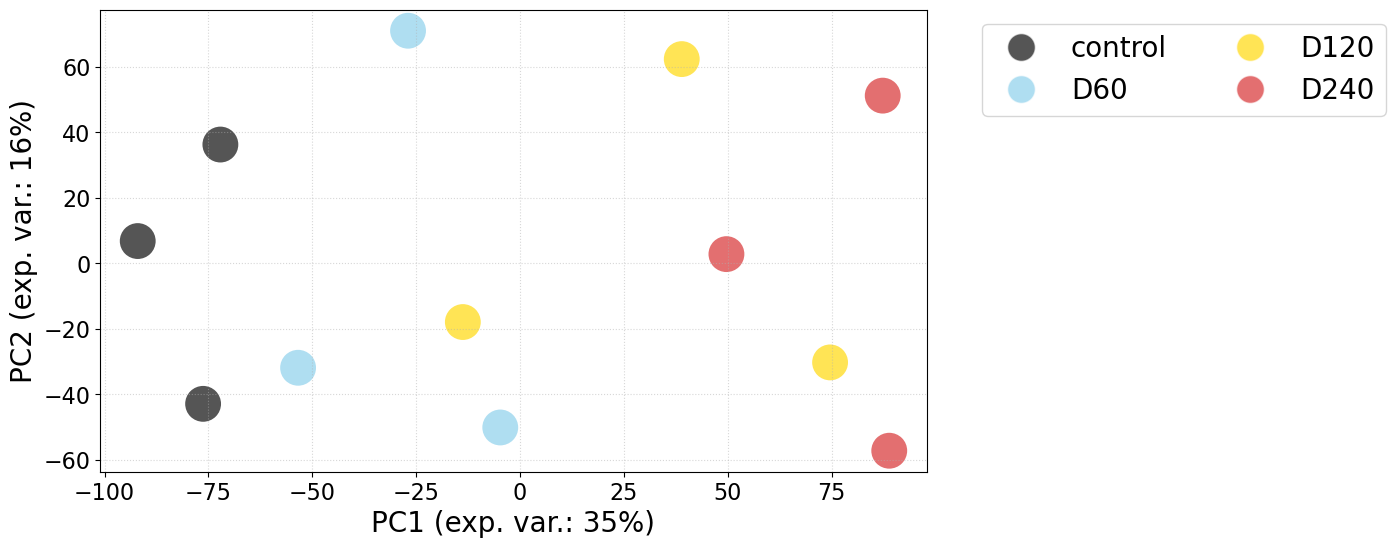

In [10]:
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=my_colors[i], marker=my_markers[i], alpha=2/3, edgecolors='none')

    epsilon = 1
    #matplotlib.pyplot.text(new[i,0]+epsilon, new[i,1]+epsilon, expression.columns[i], size=12)

matplotlib.pyplot.legend(legend_elements, ['control', 'D60', 'D120', 'D240'], ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1))
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')

# 4. visualize high expression

In [11]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_high_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.41683858 0.17128943]


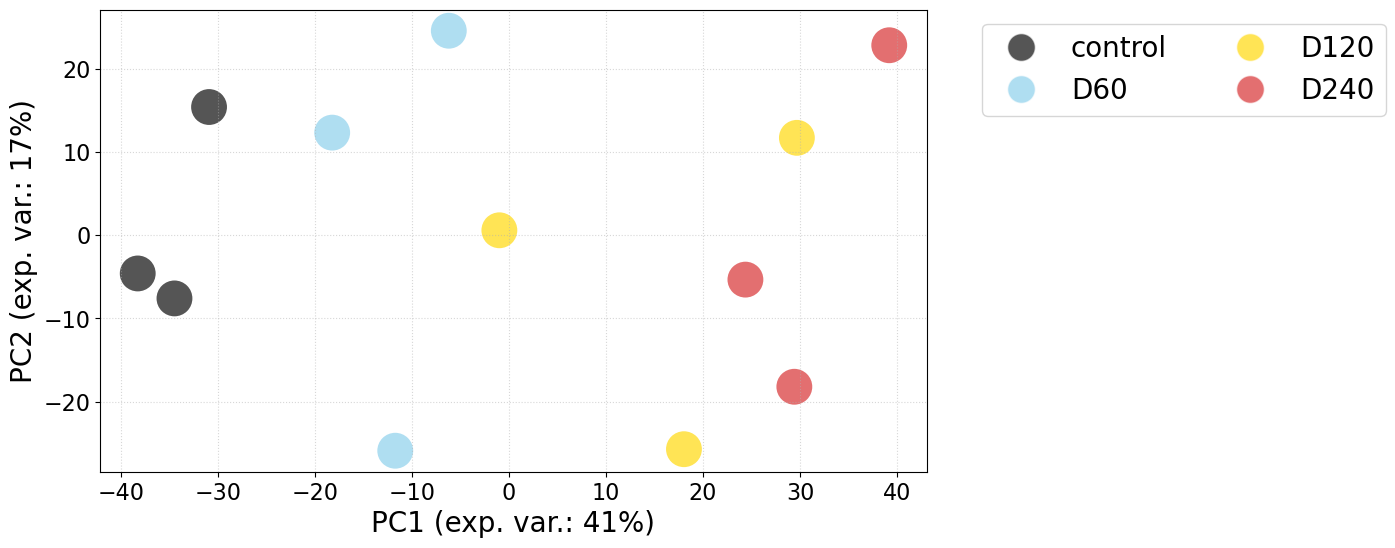

In [12]:
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=my_colors[i], marker=my_markers[i], alpha=2/3, edgecolors='none')
    
matplotlib.pyplot.legend(legend_elements, ['control', 'D60', 'D120', 'D240'], ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1))
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()